# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
I selected TMDb movie dataset for analysis, it includes details on 10,000 movies that were gathered from The Movie Database (TMDb). This data contains 21 columns and 10,866 rows and next I will clarify the names of the columns and what they indicate:
1.	id : shows a unique id for each movie.
2.	imdb_id: shows a unique id for each movie in imdb.
3.	popularity: shows how the movie is well known.
4.	budget: shows the budget for each movie. 
5.	revenue: shows the revenue of each movie.
6.	original_title: Indicates the main title of each movie.
7.	cast: shows the names of the cast for each movie separated by (|).
8.	homepage: shows link for original page for each movie.
9.	director: shows the name of the director for each movie.
10.	tagline: shows description for tagline for each movie.
11.	keywords: displays keywords when searching for each movie separated by (|).
12.	overview: shows overview for each movie.
13.	runtime: shows duration for each movie.
14.	genres: displays genres for each movie separated by (|).
15.	production_companies: shows the names of production companies for each movie separated by (|).
16.	release_date: shows the release date for each movie.
17.	vote_count: shows the number of vote by user for each movie.
18.	vote_average: shows the average of vote by user for each movie.
19.	release_year: shows the release year for each movie.
20.	budget_adj :shows the budget of the associated movie in terms of 2010 dollars.
21.	revenue_adj: show the revenue of the associated movie in terms of 2010 dollars.



### Question(s) for Analysis
1.	Which genres are most popular from year to year? 
2.	What kinds of properties are associated with movies that have high revenues?
3.	Is there a relationship between the number of votes and the popularity of the movie?
4.	What is the highest rated movie and lowest rated movie?
5.	What are the five highest budget movies?
6. What factors is correlated with runtime?
7. What factors is correlated with release date?

In [88]:
#Import statements for all of the packages that I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [89]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
In data wrangling step, I reviewed all the data and then evaluated and verified the data by discovering the problems in it, and then I moved to cleaning the data to solve all the problems

In [90]:
# In this step I loaded TMDb movie dataset and shows the first five rows
df_movie = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [91]:
#Check for dimensions of the datafram (the number of rows and columns in a dataset)
df_movie.shape

(10866, 21)

In [92]:
#showed a brief summary of the dataframe.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [93]:
#provide descriptive statistics for each data column.
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In the following cells I will check the data and make sure there are problems or not.
I checked the data by discovering incorrect data types,missing data and duplicates data.

In [94]:
# Check for incorrect data types
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [95]:
# Check for missing data
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [96]:
# Check for duplicates data
df_movie.duplicated().sum()

1

### Data Cleaning
At this stage, I have solved all the data problems and prepared them appropriately so that all the analytical questions are answered correctly

In [97]:
#drop unused columns
df_movie.drop(['imdb_id','homepage', 'tagline', 'overview','keywords','cast','director','production_companies'], axis =1,inplace = True)
df_movie.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To solve the problem of incorrect data types,I transformed both budget_adj column and revenue_adj column from float to integer
because the numbers in the table are not clear enough as shown in cell below:

In [98]:
df_movie.budget_adj=df_movie.budget_adj.astype(int)
df_movie.revenue_adj=df_movie.revenue_adj.astype(int)
#confirm the correction
df_movie.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

To Solve the problem of missing data,I Replaced NaN values to empty/blank string values as shown in cell below:

In [99]:
df_movie.fillna(' ', inplace=True)
#confirm the correction
df_movie.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

To solve the problem of duplicate data, I dropped the duplicate data because there is only one duplicate data and deleting it does not affect the rest of the data as shown in cell below:

In [100]:
df_movie.drop_duplicates(inplace=True)
#confirm the correction
sum(df_movie.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis
After I cleaned up the data, I moved  to exploratory data analysis. At this stage, I answered the analytical questions as shown below:

### Question 1: Which genres are most popular from year to year? 
To solve this question I followed the next steps:
1. Genres column contains the pipe '|' character between each genre so, I used str.cat() to connect all genres with each other and separated them with '|' character. To more information [Python | Pandas Series.str.cat()](https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/)
2. Next,I used split() to separate the genres from each other then, I stored all genres in Series. To more information [Python String | split()](https://www.geeksforgeeks.org/python-string-split/) , [Pandas Series](https://www.w3schools.com/python/pandas/pandas_series.asp)
3. In the end, I used a bar chart to show the highest popular genres.

In [101]:
#connect all genres with each other and separated them with '|'character.
split_genres=df_movie.genres.str.cat(sep = '|')
#separate the genres from each other then and stored all genres in Series.
df_genres=pd.Series(split_genres.split('|'))

In [102]:
#check the count of each genre 
df_genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
                     23
dtype: int64

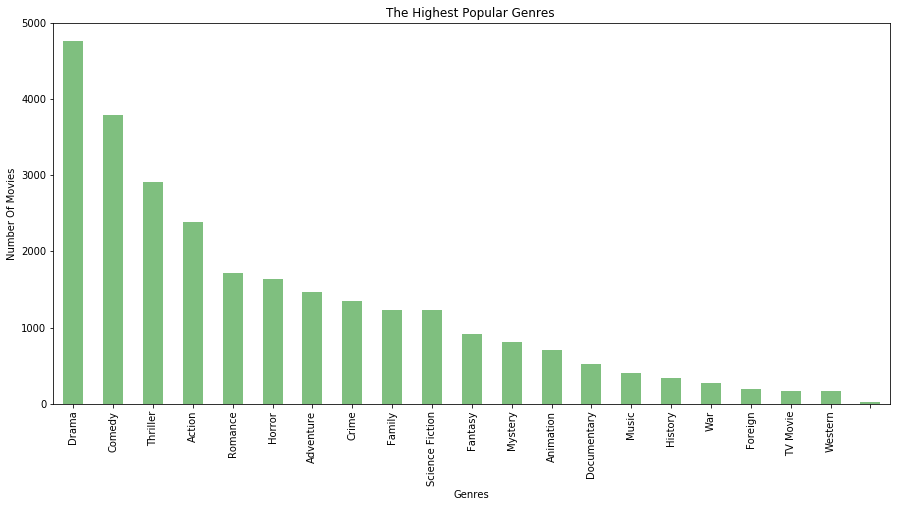

In [103]:
df_genres.value_counts().plot(kind='bar',alpha=0.5,figsize=(15,7),color="green");
plt.title('The Highest Popular Genres ')
plt.xlabel('Genres')
plt.ylabel('Number Of Movies');

So as shown in the above bar chart:

The highest popular genre of movies is Drama, accounting for 4760 movies. 

The Top three popular genres of movies are Drama, Comedy and Thriller respectively.

### Question 2: What kinds of properties are associated with movies that have high revenues?
To solve this question I followed the next steps:
1. I created a scatter_plot function to draw a scatter plot to compare revenue with other properties ( popularity, budget, runtime, release_year, vote_count and vote_average ).
2. I created a relationship function to find relationship between all properties and certain value, in this question value is revenue.

To more information [Determining Correlation on a Scatterplot](https://study.com/academy/lesson/scatter-plot-and-correlation-definition-example-analysis.html) 

In [104]:
#scatter_plot function 
def scatter_plot(x,y):
    df_movie.plot(x,y,kind='scatter',color='green');
    return plt.show()

In [105]:
# relationship function
def relationship(value):
    scatter_plot(x='popularity',y=value),
    scatter_plot(x='budget',y=value),
    scatter_plot(x='revenue',y=value),
    scatter_plot(x='runtime',y=value),
    scatter_plot(x='release_year',y=value),
    scatter_plot(x='vote_count',y=value),
    scatter_plot(x='vote_average',y=value)

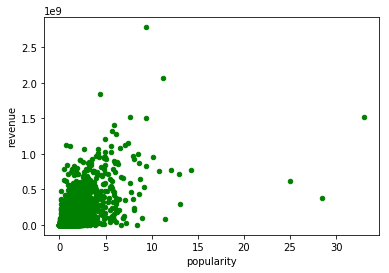

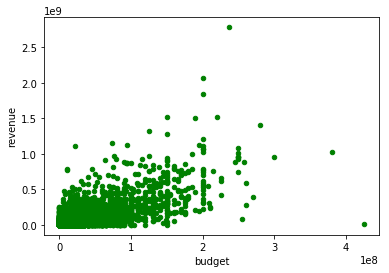

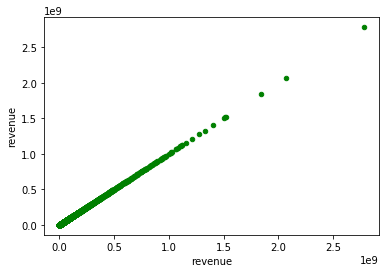

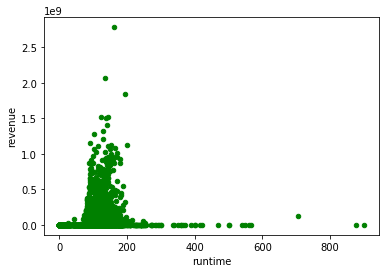

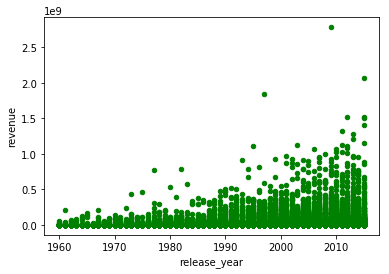

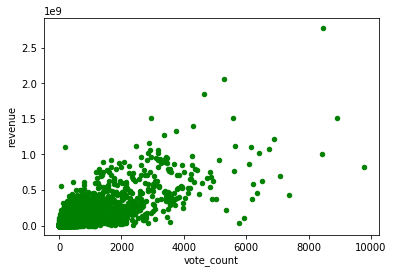

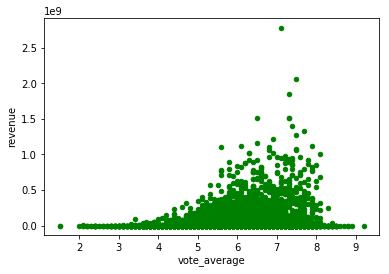

In [106]:
# call relationship function where value is revenue
relationship("revenue")


So, as shown in the above scatter plots charts:

The properties are associated with movies that have high revenues are popularity,vote_count and budget that is mean there is a relationship between revenue and popularity,vote_count and budget.
So,revenue,popularity,vote_count and budget are dependent variables.

### Question 3: Is there a relationship between the number of votes and the popularity of the movie?
To solve this question I used a previously created scatter_plot function to determine whether there is a relationship between number of votes and the popularity of the movie or not! as shown in cell below:

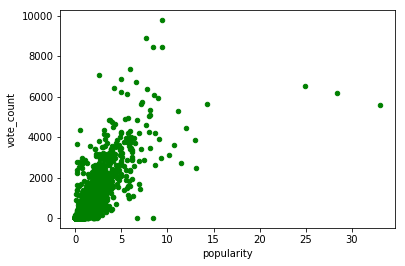

In [107]:
# call scatter_plot function 
scatter_plot(x='popularity',y='vote_count')

So, as shown in the above scatter plot chart:

There is a positive relationship between the number of votes and the popularity of the movie.

### Question 4: What is the highest rated movie and lowest rated movie?
To solve this question I followed the next steps:
1. I used max() to find highest rated movie (highest vote average) then I used query() to find the name of highest rated movie.
2. I used min() to find lowest rated movies (lowest vote average) then I used query() to find the name of lowst rated movies.

In [108]:
#use max()function 
df_movie.vote_average.max()

9.2

In [109]:
#use query() function to find h
df_movie.query('vote_average == 9.2')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,900,Documentary,9/3/11,14,9.2,2011,0,0


In [110]:
#use min()function to find low vote average
df_movie.vote_average.min()

1.5

In [111]:
#use query() function to find lowest rated movies
df_movie.query('vote_average == 1.5')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7772,25055,0.121120,0,0,Transmorphers,86,Action|Adventure|Science Fiction,6/26/07,10,1.5,2007,0,0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,74,Horror,11/15/66,15,1.5,1966,127642,0


So, I got the following results:
1. The highest rated movie is 'The Story of Film: An Odyssey' with 9.2 rating. 
2. The lowest rated movies are 'Transmorphers' and 'Manos: The Hands of Fate' with 1.5 rating.

### Question 6:What are the five highest budget movies?
To solve this question I used sort_values() function to sort movies from highest to lowest then I used head() to displays the first five highest budget movies as shown in cell below:

In [112]:
#used sort_values() and head() functions
df_budget=df_movie.sort_values(by=['budget'],axis=0,ascending=False).head()
df_budget

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.250540,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,425000000,11087569
3375,1865,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,Adventure|Action|Fantasy,5/11/11,3180,6.3,2011,368371256,990417500
7387,285,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,169,Adventure|Fantasy|Action,5/19/07,2626,6.8,2007,315500574,1010653507
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,141,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,257599886,1292632336
6570,1452,1.957331,270000000,391081192,Superman Returns,154,Adventure|Fantasy|Action|Science Fiction,6/28/06,834,5.3,2006,292050672,423020463


So, I got the following results:

The five highest budget movies are (The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron,Superman Returns) respectively.



### Question 6: What factors is correlated with runtime? 
To solve this question I used a previously created relationship function to determine whether there is a relationship between runtime and all other properties or not! as shown in cell below:

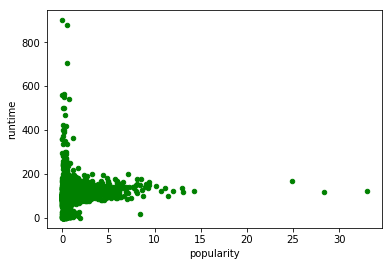

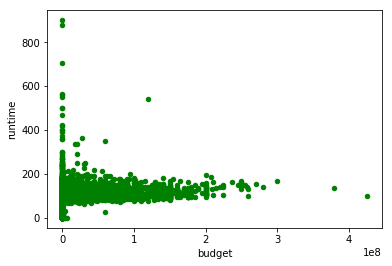

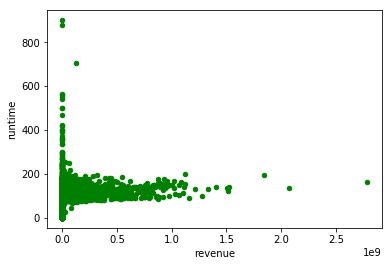

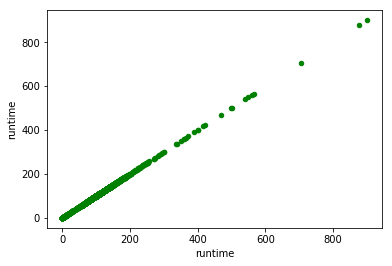

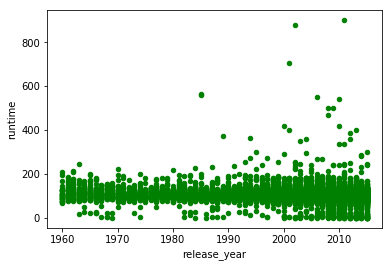

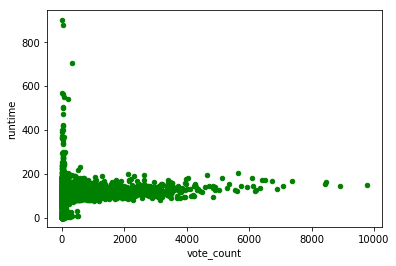

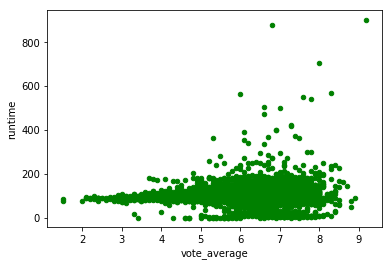

In [113]:
#call relationship function
relationship('runtime')

So, as show in above scatter plots charts, there is no relationship between runtime and other properties, which means that runtime is an independent variable that is not affected by any other variable.

### Question 7: What factors is correlated with release date?
To solve this question I used a previously created relationship function to determine whether there is a relationship between release date and all other properties or not! as shown in cell below:

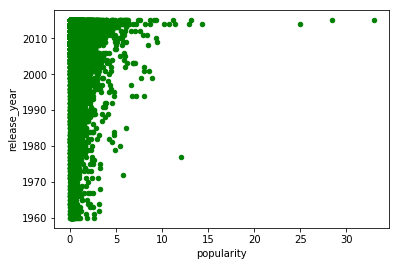

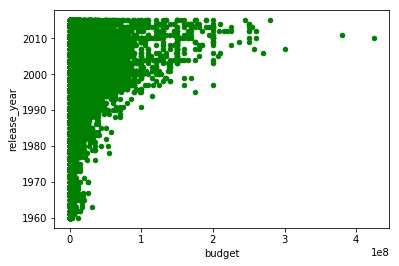

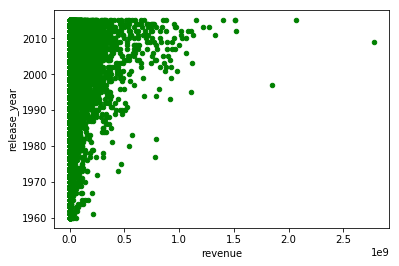

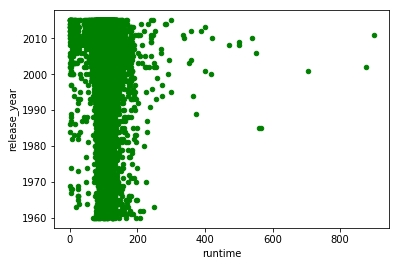

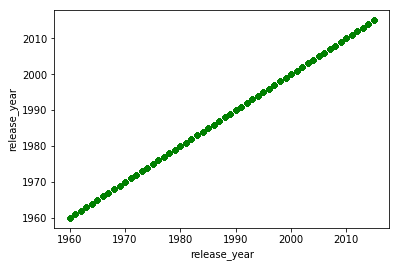

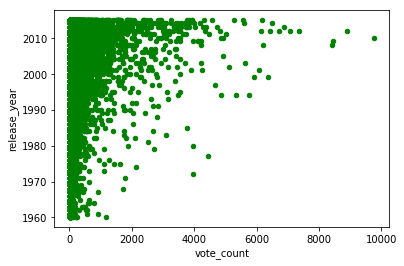

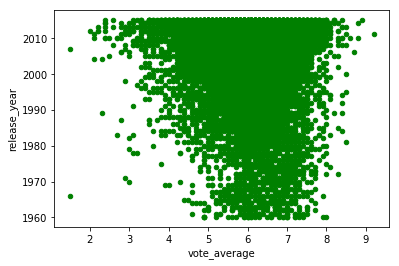

In [114]:
relationship('release_year')

So, as show in above scatter plots charts, there is no relationship between release date and other properties, which means that release date is an independent variable that is not affected by any other variable.

<a id='conclusions'></a>
## Conclusions
In the end I followed the following steps to analyzing the data of the TMDb movie:

#### 1. Questions: 
In this step, after I understood the data deeply, I began to ask questions based on this data. Here are the questions I asked: 
1.	Which genres are most popular from year to year? 
2.	What kinds of properties are associated with movies that have high revenues?
3.	Is there a relationship between the number of votes and the popularity of the movie?
4.	What is the highest rated movie and lowest rated movie?
5.	What are the five highest budget movies?
6. What factors is correlated with runtime?
7. What factors is correlated with release date?

#### 2. Data Wrangling
After I asked the questions, I moved to the Data Wrangling step, in this step I collected the information to answer the questions and I discovered problems such as: incorrect data type, missing values and duplicates values , then cleaned the data by fixing the problems in it.
#### 3. Exploratory Data Analysis
Now the data is ready to answer the questions, at this stage I have answered all the questions through statistics and illustrations, then I will mention the results I reached from my analysis of TMDb movie data:
1. The highest popular genre of movies is Drama, accounting for 4760 movies. 
2. The Top three popular genres of movies are Drama, Comedy and Thriller respectively.
3. The properties are associated with movies that have high revenues are popularity,vote_count and budget that is mean there is a relationship between revenue and popularity,vote_count and budget. So,revenue,popularity,vote_count and budget are dependent variables.
4. There is a positive relationship between the number of votes and the popularity of the movie.
5. The highest rated movie is 'The Story of Film: An Odyssey' with 9.2 rating. 
6. The lowest rated movies are 'Transmorphers' and 'Manos: The Hands of Fate' with 1.5 rating.
7. The five highest budget movies are (The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron,Superman Returns) respectively.
8. There is no relationship between runtime and other properties, which means that runtime is an independent variable that is not affected by any other variable.
9. There is no relationship between release date and other properties, which means that release date is an independent variable that is not affected by any other variable.

### Limitations:
The limitation that I faced and made difficult for me to represent some of the data is the presence of the pipe '|' character.
This is the reason for the presence of more than one value in the same row, which makes it difficult to deal with data representation. I tried to solve this problem in the first question by separating the data.
### Additional Information
Here is a list of links that helped me complete the data analysis correctly:
1. [Python | Pandas Series.str.cat()](https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/)
2. [Determining Correlation on a Scatterplot](https://study.com/academy/lesson/scatter-plot-and-correlation-definition-example-analysis.html)
3. [Pandas Series](https://www.w3schools.com/python/pandas/pandas_series.asp)
4. [Python String | split()](https://www.geeksforgeeks.org/python-string-split/)

## Submitting your Project 

In [115]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0